# First reference notebook

* Top 5
* Calculated column with split function
* Seaborn countplot
* Convert string to datetime format
* Convert the column from strings to DateTime objects
* Calculated columns for Hour, Month, and Day of Week
* Create a new column called 'Date' that contains the date from the timeStamp column

** What are the top 5 zipcodes for 911 calls? **

In [7]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [9]:
df['title'].nunique()

110

** Calculated column with split function**

In [10]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

** Now use seaborn to create a countplot of 911 calls by Reason. **

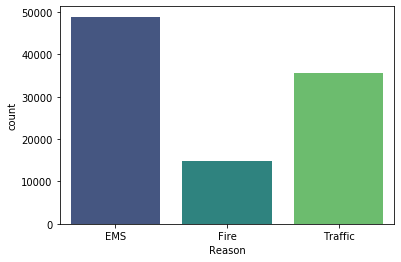

In [13]:
sns.countplot(x = 'Reason', data = df, palette = 'viridis')

___
** Convert string to datetime format **

In [14]:
type(df['timeStamp'].iloc[0])

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [15]:
df['timeStamp'] = pd.to_datetime (df['timeStamp'])

In [16]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

**Calculated columns for Hour, Month, and Day of Week**

In [17]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [19]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [21]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [22]:
df['Day of week'] = df['Day of week'].map(dmap)

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

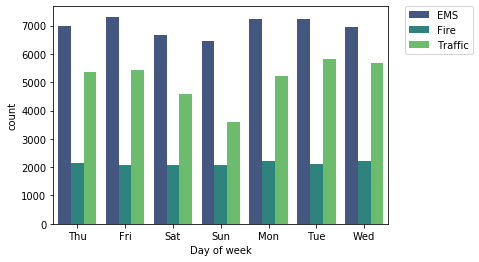

In [24]:
sns.countplot(x = 'Day of week', data = df, hue= 'Reason', palette= 'viridis')
# To relocate the legend
plt.legend(bbox_to_anchor= (1.05, 1), loc = 2, borderaxespad = 0.)

**Create a new column called 'Date' that contains the date from the timeStamp column. ** 

In [6]:
t.date()

NameError: name 't' is not defined

In [33]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

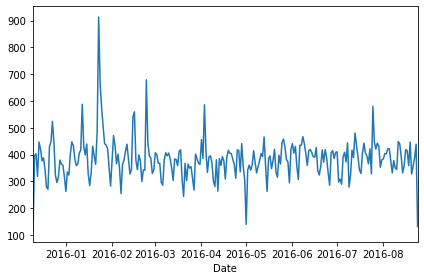

In [42]:
df.groupby('Date').count()['Reason'].plot()
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [47]:
df.groupby(by=['Day of week', 'Hour']).count()['Reason']

Day of week  Hour
Fri          0       275
             1       235
             2       191
             3       175
             4       201
                    ... 
Wed          19      686
             20      668
             21      575
             22      490
             23      335
Name: Reason, Length: 168, dtype: int64

In [49]:
dayHour = df.groupby(by=['Day of week', 'Hour']).count()['Reason'].unstack()

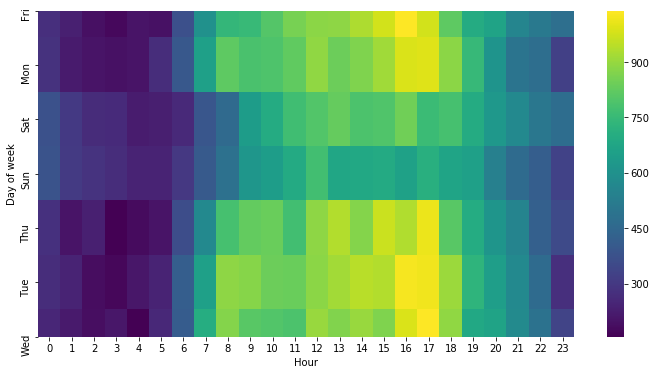

In [51]:
plt.figure(figsize = (12,6))
sns.heatmap(dayHour, cmap = 'viridis')